<a href="https://colab.research.google.com/github/davidriveraarbelaez/IA_Explorador/blob/main/Tema_1_Regresi%C3%B3n_log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
import seaborn as sns

**Paso 1: Preparar el Dataset**

Convertimos rating en una variable binaria:

    0: Calificaciones de 1 a 3 (consideradas "bajas").
    1: Calificaciones de 4 a 5 (consideradas "altas").


In [ ]:
# Cargar el dataset
data_logistic = pd.read_csv('/content/product_ratings_with_features.csv')

# Crear la variable binaria 'rating_high' para clasificación
data_logistic['rating_high'] = data_logistic['rating'].apply(lambda x: 1 if x >= 4 else 0)

# Definir variables predictoras y la variable dependiente
X = data_logistic[['views', 'is_featured', 'is_discounted']]
y = data_logistic['rating_high']

# Agregar una constante al modelo
X = sm.add_constant(X)


**Paso 2: Ajustar el Modelo de Regresión Logística**

Ajustamos el modelo utilizando statsmodels.

In [ ]:
# Ajustar el modelo de regresión logística
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Resumen de los resultados
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.106581
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:            rating_high   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Fri, 08 Nov 2024   Pseudo R-squ.:                  0.8203
Time:                        15:28:50   Log-Likelihood:                -10.658
converged:                       True   LL-Null:                       -59.295
Covariance Type:            nonrobust   LLR p-value:                 5.991e-21
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -24.8320      7.163     -3.467      0.001     -38.870     -10.794
views             0

**Paso 3: Evaluación del Modelo**
1. Coeficiente de Determinación (Pseudo R²)

El pseudo R² es una métrica que, aunque no es equivalente al R² de una regresión lineal, se usa para medir qué tan bien el modelo se ajusta a los datos. Un valor más alto indica un mejor ajuste.

In [ ]:
# Pseudo R² (McFadden)
pseudo_r2 = 1 - (result.llf / result.llnull)
print("Pseudo R² (McFadden):", pseudo_r2)


Pseudo R² (McFadden): 0.820253297242999


2. Predicciones y Tabla de Contingencia

Generamos las predicciones y creamos una tabla de contingencia (matriz de confusión) para observar el desempeño del modelo.

Matriz de Confusión:
 [[71  1]
 [ 2 26]]


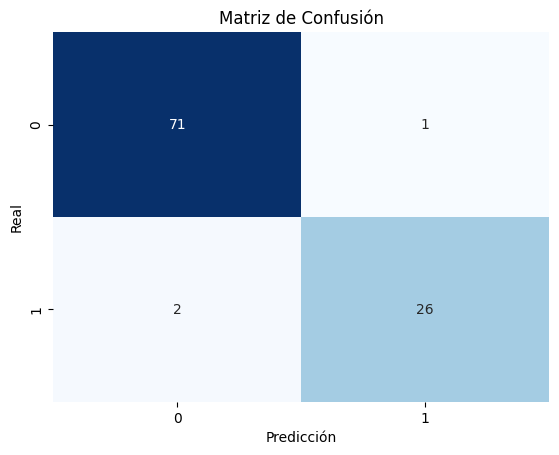


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.96      0.93      0.95        28

    accuracy                           0.97       100
   macro avg       0.97      0.96      0.96       100
weighted avg       0.97      0.97      0.97       100

Exactitud del Modelo: 0.97


In [ ]:
# Predicciones de clasificación
y_pred_prob = result.predict(X)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Tabla de Contingencia
conf_matrix = confusion_matrix(y, y_pred)
print("Matriz de Confusión:\n", conf_matrix)

# Visualización de la Matriz de Confusión
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y, y_pred))
print("Exactitud del Modelo:", accuracy_score(y, y_pred))


3. Curva ROC y AUC

La Curva ROC y el AUC miden la capacidad del modelo para diferenciar entre clases. Un AUC cercano a 1 indica un modelo con excelente capacidad de clasificación.

Área bajo la Curva ROC (AUC): 0.9905753968253969


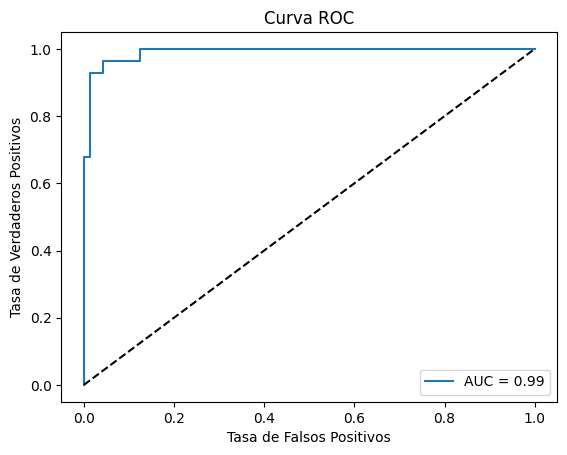

In [ ]:
# Calcular la Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
auc = roc_auc_score(y, y_pred_prob)
print("Área bajo la Curva ROC (AUC):", auc)

# Graficar la Curva ROC
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()


    * Pseudo R²: Mide el ajuste general del modelo.
    * Matriz de Confusión: Evalúa la precisión y sensibilidad del modelo.
    * Curva ROC y AUC: Mide la capacidad del modelo para clasificar correctamente.